In [105]:
import os
import sys
import glob
import operator as op
import itertools as it
from functools import reduce, partial
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

**Due: 4 PM on Wednesday, 2 Mar 2016**

The usual warnings apply - the homework is not officially released until 25 Feb 2016, and we may make changes till then.

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc. is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

Background for Exercises 1 and 2
----

The first 2 exercises are about using Newton's method to find the cube roots of unity - find $z$ such that $z^3 = 1$. From the fundamental theorem of algebra, we know there must be exactly 3 complex roots since this is a degree 3 polynomial.

We start with Euler's fabulous equation
$$
e^{ix} = \cos x + i \sin x
$$

Raising $e^{ix}$ to the $n$th power where $n$ is an integer, we get from Euler's formula with $nx$ substituting for $x$
$$
(e^{ix})^n = e^{i(nx)} = \cos nx + i \sin nx
$$

Whenever $nx$ is an integer multiple of $2\pi$ (i.e. $n=2\pi k$), we have
$$
\cos nx + i \sin nx = 1
$$

So
$$
e^{2\pi i \frac{k}{n}}
$$
is a root of 1 whenever $k/n = 0, 1, 2, \ldots$.

So the cube roots of unity are $1, e^{2\pi i/3}, e^{4\pi i/3}$. 

While we can do this analytically, the idea is to use Newton's method to find the basins of attraction for these roots, and in the process, discover some rather perplexing behavior of Newton's method.


In [106]:
from sympy import Symbol, exp, I, pi, N, expand
from sympy import init_printing 
init_printing()

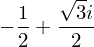

In [107]:
expand(exp(2*pi*I/3), complex=True)

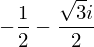

In [108]:
expand(exp(4*pi*I/3), complex=True)

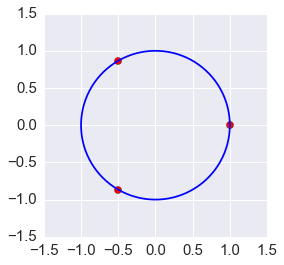

In [109]:
plt.figure(figsize=(4,4))
roots = np.array([[1,0], [-0.5, np.sqrt(3)/2], [-0.5, -np.sqrt(3)/2]])
plt.scatter(roots[:,0], roots[:,1], s=50, c='red')
xp = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(xp), np.sin(xp), c='blue');

**Exercise 1 (20 points)**. Netwon's method for functions of complex variables - stability and basins of attraction.

1. Write a function with the following function signature `newton(z, f, fprime, max_iter=100, tol=1e-6)` where
    - `z` is a starting value (a complex number e.g.` 3 + 4j`)
    - `f` is a function of `z`
    - `fprime` is the derivative of  `f`
The function will run until either max_iter is reached or the absolute value of the Newton step is less than tol. In either case, the function should return the number of iterations taken and the final value of `z` as a tuple (`i`, `z`). 

2. Define the function `f` and `fprime` that will result in Newton's method finding the cube roots of 1. Find 3 starting points that will give different roots, and print both the start and end points. 

In [110]:
def f(z):
    return z**3 -1

def fprime(z):
    return 3*z**2

In [111]:
def newton(z, f, fprime, max_iter=100, tol=1e-6):
    for i in range(max_iter):
        z_nextval = z - complex(f(z))/complex(fprime(z))
        if abs(z_nextval-z) < tol:
            break
        z = z_nextval
    return (i+1, complex(round(z.real,4), round(z.imag,4)))

print("Starting at ", complex(-3, 4), " and the root is ", newton(complex(-3, 4), f, fprime)[1])
print("Starting at ", complex(-3, -4), " and the root is ",  newton(complex(-3, -4), f, fprime)[1])
print("Starting at ", complex(9, 0), " and the root is ", newton(complex(9, 0), f, fprime)[1])

Starting at  (-3+4j)  and the root is  (-0.5+0.866j)
Starting at  (-3-4j)  and the root is  (-0.5-0.866j)
Starting at  (9+0j)  and the root is  (1+0j)


  **Exercise 2 (20 points)**. Write the following two plotting functions to see some (pretty) aspects of Newton's algorithm in the complex plane.
  
  1. The first function `plot_newton_iters(f, fprime, n=200, extent=[-1,1,-1,1], cmap='hsv')` calculates and stores the number of iterations taken for convergence (or max_iter) for each point in a 2D array. The 2D array limits are given by `extent` - for example, when `extent = [-1,1,-1,1]` the corners of the plot are `(-i, -i), (1, -i), (1, i), (-1, i)`. There are `n` grid points in both the real and imaginary axes. The argument `cmap` specifies the color map to use - the suggested defaults are fine. Finally plot the image using `plt.imshow` - make sure the axis ticks are correctly scaled. Make a plot for the cube roots of 1.

2. The second function `plot_newton_basins(f, fprime, n=200, extent=[-1,1,-1,1], cmap='jet')` has the same arguments, but this time the grid stores the identity of the root that the starting point convered to. Make a plot for the cube roots of 1 - since there are 3 roots, there should be only 3 colors in the plot.


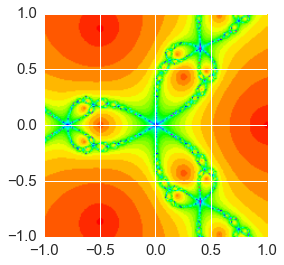

In [112]:
def plot_newton_iters(f, fprime, n=200, extent=[-1,1,-1,1], cmap='hsv'):
    
    array = np.zeros((n,n))
    xp = np.linspace(extent[0], extent[1], n)
    yp = np.linspace(extent[2], extent[3], n)
    
    for i,x in enumerate(xp):
        for j,y in enumerate(yp):
            array[j,i] = newton(complex(x, y), f, fprime)[0]
            
    plt.imshow(array, extent = extent, cmap =cmap)
    
plot_newton_iters(f,fprime)

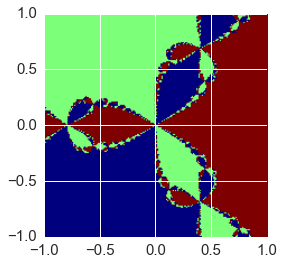

In [113]:
roots = [newton(complex(-3, 4), f, fprime)[1], newton(complex(-3, -4), f, fprime)[1], newton(complex(9, 0), f, fprime)[1]]

def plot_newton_basins(f, fprime, n=200, extent=[-1,1,-1,1], cmap='jet'):
    array = np.zeros((n,n))
    
    xp = np.linspace(extent[0], extent[1], n)
    yp = np.linspace(extent[2], extent[3], n)
    
    for i in range(n):
        for j in range(n):
            root = newton(complex(xp[i], yp[j]), f, fprime)[1]
            array[j,i] = roots.index(root)
            
    plt.imshow(array, extent = extent, cmap=cmap)

plot_newton_basins(f, fprime) 

**Exercise 3 (30 points)**. Create your own steepest descent optimizer.

1. Your optimizer should take as arguments a function $f$, its gradient, an initial guess, a step size, a tolerance (to determine convergence), and a maximum number of steps. It should output convergence status, total number of steps, and the value of the input variable that optimizes $f$.

2. Setting $\alpha = -0.05$, use your optimizer to find the minimum of
$$f(x,y) = x^2 + 2y^2$$
   using an initial guess of $(0.1,0.1)$, a tolerance of $0.001$ and a max of $100$ interations.

3. In this case, it is possible to (analytically) determine the optimal step size. Compute the optimal step size  $\alpha^*$ for the initial point of $(0.1,0.1)$ and run the optimizer using step sizes $\alpha = \alpha^*/2$ and $\alpha = 2\alpha^*$. What do you observe about the behavior of the optimizer as step size is varied?

In [114]:
# 1
def steepest_Descent(f, fgrad, z, stepsize, max_iter=100, tol=1e-6):
    
    for i in range(max_iter):
        z_nextval = z - fgrad(z)*stepsize
        if np.linalg.norm(z_nextval-z) < tol:
            break
        z = z_nextval
    if i+1 == max_iter:
        convergence = False
    else:
        convergence = True
    return (convergence, i+1, z_nextval)

In [115]:
# 2
def f(x):
    return x[0]**2+2*x[1]**2

def fgrad(x):
    return np.array([2*x[0], 4*x[1]])

# Initial guess
x0 = np.array([0.1,0.1])

steepest_Descent(f, fgrad, x0, stepsize=0.05, max_iter=100, tol=0.001)

(True, 23, array([ 0.00886294,  0.0005903 ]))

In [116]:
# 3
alpha = np.linspace(0.001,0.999,num=999)

# Optimal step size
best_alpha = alpha[np.argmin([f(x0 - a*fgrad(x0)) for a in alpha])]
print("Optimal step size", best_alpha, "\n")

print("When step size", best_alpha)
print(steepest_Descent(f, fgrad, x0, stepsize=best_alpha, max_iter=100, tol=0.001))
print("When step size", best_alpha/2)
print(steepest_Descent(f, fgrad, x0, stepsize=best_alpha/2, max_iter=100, tol=0.001))
print("When step size", best_alpha*2)
print(steepest_Descent(f, fgrad, x0, stepsize=2*best_alpha, max_iter=100, tol=0.001))

Optimal step size 0.278 

When step size 0.278
(True, 6, array([  7.66121801e-04,   1.97382269e-07]))
When step size 0.139
(True, 12, array([  2.00653330e-03,   5.86942613e-06]))
When step size 0.556
(False, 100, array([  8.35222657e-97,   5.99986918e+07]))


Conclusion: We can see from above that setting the step size as half of the optimum, the speed of convergence is about twice as slow, while setting the step size as double of the optimum, it might lead to divergence.

**Exercise 4 (30 points)**. Conjugate Gradient. 

Consider the function:

$$f:\mathbb{R}^2\rightarrow \mathbb{R}$$
$$(x,y) \mapsto x^2 +2y^2 -2x+y$$

The following is intended to help you understand the conjugate gradient method, by computing the first two steps by hand ('by hand' means that you write code to explicitly compute each of the values requested).

1. Express the function $f$ in matrix form.

2. Starting at some initial point $x_0\in \mathbb{R}^2$, compute $\alpha_0,p_0,x_1,\alpha_1,p_1$ and $x_2$ as defined in the notes on Newton-CG.

1.
Express the function f in matrix form

$$f \pmatrix{x \\ y} = \frac{1}{2} \pmatrix{x &y} 
\pmatrix{
    2 & 0\\
    0 & 4\\
}\pmatrix{x \\ y} + \pmatrix{-2 & 1 }\pmatrix{x \\ y}$$


2.

In this problem $A = \pmatrix{2 & 0\\0 & 4\\}$, $b = \pmatrix{-2 \\ 1}$ 

This reduces the optimization problem to finding the zeros of 
$$Ax = -b$$
Suppose we have a set of $n$ vectors $p_1,...,p_n$ that are mutually conjugate.  These vectors form a basis of $\mathbb{R}^n$.  Getting back to the problem at hand, this means that our solution vector $x$ to the linear problem may be written as follows:

$$x = \sum\limits_{i=1}^n \alpha_i p_i$$

So, finding $x$ reduces to finding a conjugate basis and the coefficients for $x$ in that basis.

Now we have:
$$p^TAx = \sum\limits_{i=1}^n \alpha_i p^TA p_i$$ 
$$ {p}_k^{T} {A}{x} = {p}_k^{T} (-b) $$

And we can solve for $\alpha_k$:
$$\alpha_k = \frac{{p}_k^{T}{(-b)}}{{p}_k^{T} {A}{p}_k} = -\frac{\langle {p}_k, {b}\rangle}{\,\,\,\langle {p}_k,  {p}_k\rangle_{A}} = -\frac{\langle{p}_k, {b}\rangle}{\,\,\,\|{p}_k\|_{A}^2}.$$

With  initial point $x_0$, set $p_0 = \nabla f(x_0)$ and $x_1 = x_0 + \alpha_0p_0$, 
then the conjugate vector is:

$$p_1 = \nabla f(x_1) - \frac{p_0^TA\nabla f(x_1)}{{p}_0^{T}{A}{p}_0} {p}_0$$

In [117]:
# 1
def f(x):
    return x[0]**2 + 2*x[1]**2 - 2*x[0] + x[1]

def fgrad(x):
    return np.array([2*x[0]-2, 4*x[1] +1])

def NewtonCG(x0,A,b):
    p0 = fgrad(x0)
    a0 = -np.dot(p0,b)/p0.dot(A).dot(p0)
    x1 = x0 + a0 * p0
    p1 = fgrad(x1) - p0.dot(A).dot(fgrad(x1))*p0/(p0.dot(A).dot(p0))
    a1 = -np.dot(p1,b)/p1.dot(A).dot(p1)
    x2 = x1 + a1 * p1
    return {"a0": a0, "p0": p0, "x1": x1, "p1": p1, "a1": a1, "x2": x2}

In [118]:
# 2 Using two different starting points
NewtonCG([9,0],np.diag([2,4]),np.array([-2,1]))

{'a0': 0.060077519379844964,
 'a1': -2.6008064516129368,
 'p0': array([16,  1]),
 'p1': array([-0.01490295,  0.1192236 ]),
 'x1': array([ 9.96124031,  0.06007752]),
 'x2': array([ 10.  ,  -0.25])}

In [119]:
NewtonCG([-3,4],np.diag([2,4]),np.array([-2,1]))

{'a0': -0.025700934579439252,
 'a1': -2.145721925133703,
 'p0': array([-8, 17]),
 'p1': array([-0.37022156, -0.08711096]),
 'x1': array([-2.79439252,  3.56308411]),
 'x2': array([-2.  ,  3.75])}